In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\admin\Desktop\iNeuron Internship\flights.csv')

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
airports_df = pd.read_csv(r'C:\Users\admin\Desktop\iNeuron Internship\airports.csv')
airports_col = airports_df['IATA_CODE'].values

In [4]:
dataset = df.loc[df['ORIGIN_AIRPORT'].isin(airports_col)]

In [5]:
dataset = dataset.sample(50000)

In [6]:
dataset.shape

(50000, 31)

In [7]:
dataset.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5524664,2015,12,13,7,EV,5062,N914EV,VLD,ATL,700,...,748.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5639166,2015,12,20,7,AA,2202,N4XBAA,DFW,TUS,1015,...,1120.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1066916,2015,3,11,3,UA,333,N653UA,ORD,EWR,1200,...,1519.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
168325,2015,1,11,7,UA,1660,N23707,SNA,EWR,2107,...,500.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4212979,2015,9,20,7,WN,1122,N639SW,HOU,DAL,700,...,754.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3085627,2015,7,12,7,DL,2386,N975DL,ATL,LGA,2140,...,2348.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
765799,2015,2,20,5,WN,355,N731SA,LGA,MKE,1035,...,1210.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4293124,2015,9,25,5,WN,2982,N7743B,MSY,ATL,630,...,903.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2796166,2015,6,25,4,WN,1403,N8615E,AUS,LAS,1125,...,1228.0,18.0,0,0,NaN,0.0,0.0,2.0,16.0,0.0
415962,2015,1,28,3,AA,324,N3DFAA,DFW,MCO,1110,...,1419.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.shape

(50000, 31)

In [9]:
dataset.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 5524664 to 5036574
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   DAY                  50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   FLIGHT_NUMBER        50000 non-null  int64  
 6   TAIL_NUMBER          49872 non-null  object 
 7   ORIGIN_AIRPORT       50000 non-null  object 
 8   DESTINATION_AIRPORT  50000 non-null  object 
 9   SCHEDULED_DEPARTURE  50000 non-null  int64  
 10  DEPARTURE_TIME       49212 non-null  float64
 11  DEPARTURE_DELAY      49212 non-null  float64
 12  TAXI_OUT             49193 non-null  float64
 13  WHEELS_OFF           49193 non-null  float64
 14  SCHEDULED_TIME       50000 non-null  float64
 15  ELAPSED_TIME         49059 n

In [10]:
col = dataset.columns[dataset.dtypes=='object']
col

Index(['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'CANCELLATION_REASON'],
      dtype='object')

In [11]:
cols = dataset[col].isnull().sum()!=0
cols

AIRLINE                False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
CANCELLATION_REASON     True
dtype: bool

In [12]:
# Dropping the column 'TAIL_NUMBER' & 'CANCELLATION_REASON'

dataset.drop([cols.index[1], cols.index[4]], axis=1, inplace=True)

In [13]:
dataset.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME           788
DEPARTURE_DELAY          788
TAXI_OUT                 807
WHEELS_OFF               807
SCHEDULED_TIME             0
ELAPSED_TIME             941
AIR_TIME                 941
DISTANCE                   0
WHEELS_ON                835
TAXI_IN                  835
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME             835
ARRIVAL_DELAY            941
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       40515
SECURITY_DELAY         40515
AIRLINE_DELAY          40515
LATE_AIRCRAFT_DELAY    40515
WEATHER_DELAY          40515
dtype: int64

In [14]:
columns = dataset.columns[dataset.isnull().sum()>0]
columns

Index(['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [15]:
for i in columns:
    mean = dataset[i].mean()
    dataset[i] = dataset[i].fillna(mean)

In [16]:
dataset.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

#### Creating the Target column from Arrival Delay(>10 mins is Delayed)

In [17]:
dataset['Target'] = np.where(dataset['ARRIVAL_DELAY']>=10,1,0)

In [18]:
dataset.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Target
5524664,2015,12,13,7,EV,5062,VLD,ATL,700,654.0,...,748.0,-17.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,0
5639166,2015,12,20,7,AA,2202,DFW,TUS,1015,1010.0,...,1120.0,-20.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,0
1066916,2015,3,11,3,UA,333,ORD,EWR,1200,1206.0,...,1519.0,11.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,1
168325,2015,1,11,7,UA,1660,SNA,EWR,2107,2110.0,...,500.0,-5.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,0
4212979,2015,9,20,7,WN,1122,HOU,DAL,700,655.0,...,754.0,-6.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,0


## Exploratory Data Analysis

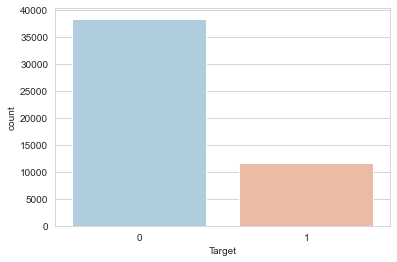

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=dataset,palette='RdBu_r')

In [20]:
dataset['Target'].value_counts()

0    38378
1    11622
Name: Target, dtype: int64

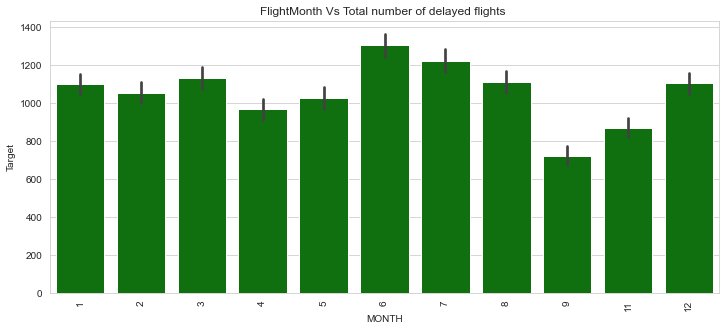

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['MONTH']))
ax = sns.barplot(x='MONTH',y ='Target', data=dataset, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightMonth Vs Total number of delayed flights ")

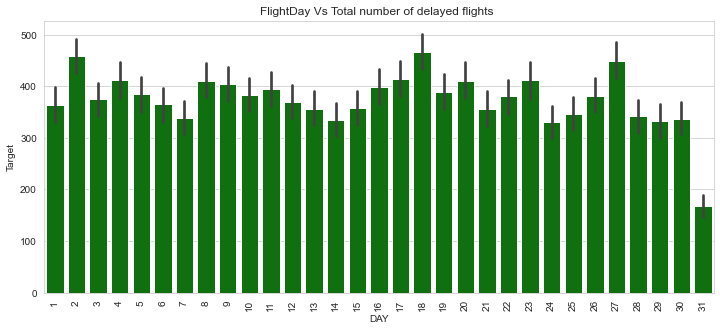

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['DAY']))
ax = sns.barplot(x='DAY',y ='Target', data=dataset, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDay Vs Total number of delayed flights ")

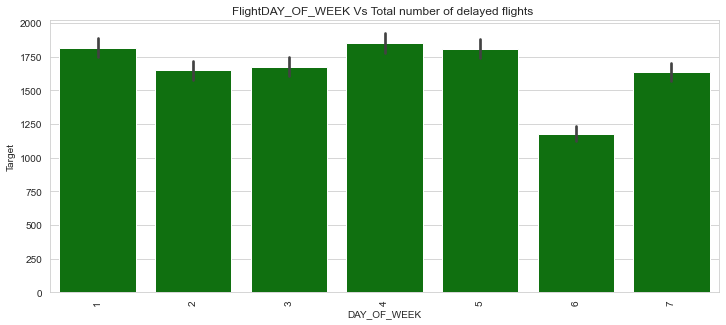

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['DAY_OF_WEEK']))
ax = sns.barplot(x='DAY_OF_WEEK',y ='Target', data=dataset, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDAY_OF_WEEK Vs Total number of delayed flights ")

In [24]:
def timing(value):
    if value >= 600 and value < 1200:
        return "Morning"
    elif value >= 1200 and value < 1600:
        return "Afternoon"
    else:
        return "Evening"
dataset['Arrival_Timing'] = dataset['ARRIVAL_TIME'].apply(timing)

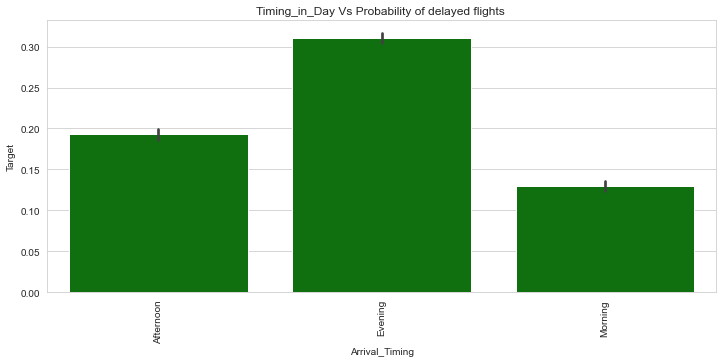

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['Arrival_Timing']))
ax = sns.barplot(x='Arrival_Timing',y ='Target', data=dataset, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("Timing_in_Day Vs Probability of delayed flights ")

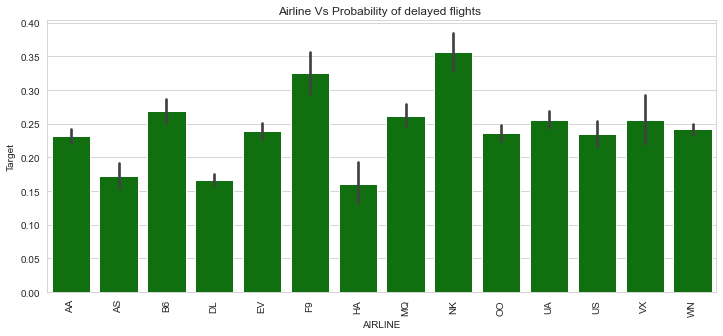

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(dataset['AIRLINE']))
ax = sns.barplot(x='AIRLINE',y ='Target', data=dataset, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("Airline Vs Probability of delayed flights ")

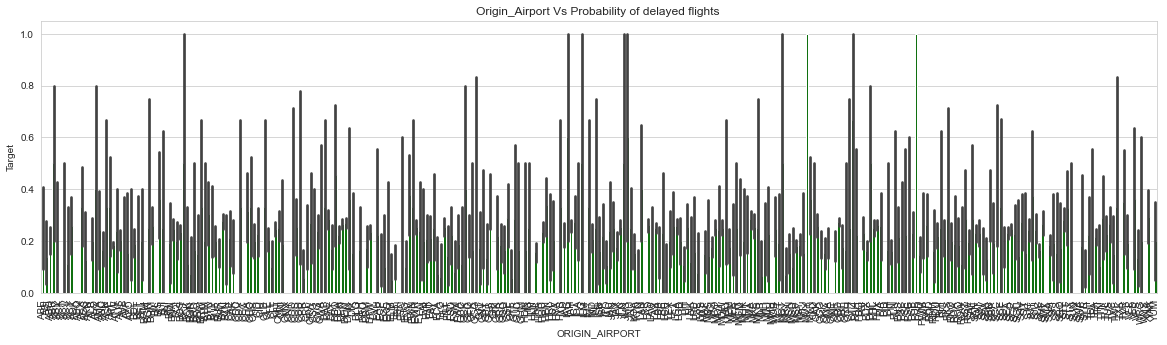

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
order = np.unique(list(dataset['ORIGIN_AIRPORT']))
ax = sns.barplot(x='ORIGIN_AIRPORT',y ='Target', data=dataset, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("Origin_Airport Vs Probability of delayed flights ")

In [28]:
dataset.groupby(['ORIGIN_AIRPORT'])['Target'].mean().sort_values(ascending=False)

ORIGIN_AIRPORT
MVY    1.000000
PUB    1.000000
OTZ    0.666667
IAG    0.600000
JMS    0.600000
         ...   
BLI    0.000000
SMX    0.000000
LAR    0.000000
BIL    0.000000
HYA    0.000000
Name: Target, Length: 317, dtype: float64

## Outlier Handling

In [29]:
dataset.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Target,Arrival_Timing
5524664,2015,12,13,7,EV,5062,VLD,ATL,700,654.0,...,-17.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,0,Morning
5639166,2015,12,20,7,AA,2202,DFW,TUS,1015,1010.0,...,-20.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,0,Morning
1066916,2015,3,11,3,UA,333,ORD,EWR,1200,1206.0,...,11.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,1,Afternoon
168325,2015,1,11,7,UA,1660,SNA,EWR,2107,2110.0,...,-5.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,0,Evening
4212979,2015,9,20,7,WN,1122,HOU,DAL,700,655.0,...,-6.0,0,0,13.352662,0.052715,19.565525,23.531682,3.587138,0,Morning


##### Extracting only the integer and float column to find the Outlier

In [30]:
col_int = list(dataset.columns[dataset.dtypes=='int64'])
col_int

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'FLIGHT_NUMBER',
 'SCHEDULED_DEPARTURE',
 'DISTANCE',
 'SCHEDULED_ARRIVAL',
 'DIVERTED',
 'CANCELLED']

In [31]:
col_float = list(dataset.columns[dataset.dtypes=='float64'])
col_float

['DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'WHEELS_ON',
 'TAXI_IN',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [32]:
col_Outlier = col_int+col_float
col_Outlier

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'FLIGHT_NUMBER',
 'SCHEDULED_DEPARTURE',
 'DISTANCE',
 'SCHEDULED_ARRIVAL',
 'DIVERTED',
 'CANCELLED',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'WHEELS_ON',
 'TAXI_IN',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

##### Finding the Outlier using Emprical rule

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss = StandardScaler()

In [35]:
X = dataset[col_Outlier]
X.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,...,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5524664,2015,12,13,7,5062,700,208,805,0,0,...,38.0,743.0,5.0,748.0,-17.0,13.352662,0.052715,19.565525,23.531682,3.587138
5639166,2015,12,20,7,2202,1015,813,1140,0,0,...,114.0,1119.0,1.0,1120.0,-20.0,13.352662,0.052715,19.565525,23.531682,3.587138
1066916,2015,3,11,3,333,1200,719,1508,0,0,...,86.0,1508.0,11.0,1519.0,11.0,13.352662,0.052715,19.565525,23.531682,3.587138
168325,2015,1,11,7,1660,2107,2434,505,0,0,...,275.0,453.0,7.0,500.0,-5.0,13.352662,0.052715,19.565525,23.531682,3.587138
4212979,2015,9,20,7,1122,700,239,800,0,0,...,43.0,744.0,10.0,754.0,-6.0,13.352662,0.052715,19.565525,23.531682,3.587138


In [36]:
for i in col_Outlier:
    X[i] = ss.fit_transform(X[i].values.reshape(-1,1))

<ipython-input-36-7cb750689bda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ss.fit_transform(X[i].values.reshape(-1,1))
<ipython-input-36-7cb750689bda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ss.fit_transform(X[i].values.reshape(-1,1))
<ipython-input-36-7cb750689bda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [37]:
X.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,...,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5524664,0.0,1.703492,-0.306181,1.540015,1.633932,-1.300186,-1.014577,-1.364438,-0.051057,-0.128403,...,-1.060798,-1.400081,-0.425663,-1.385479,-0.546948,-2.800471e-16,1.314635e-17,0.0,3.840037e-16,-7.249180e-17
5639166,0.0,1.703492,0.491676,1.540015,0.011246,-0.649739,-0.016417,-0.703164,-0.051057,-0.128403,...,0.005521,-0.676573,-1.121481,-0.676117,-0.620894,-2.800471e-16,1.314635e-17,0.0,3.840037e-16,-7.249180e-17
1066916,0.0,-0.953279,-0.534141,-0.466010,-1.049174,-0.267731,-0.171503,0.023249,-0.051057,-0.128403,...,-0.387333,0.071950,0.618062,0.084731,0.143223,-2.800471e-16,1.314635e-17,0.0,3.840037e-16,-7.249180e-17
168325,0.0,-1.543672,-0.534141,1.540015,-0.296270,1.605143,2.657991,-1.956623,-0.051057,-0.128403,...,2.264434,-1.958106,-0.077755,-1.858387,-0.251160,-2.800471e-16,1.314635e-17,0.0,3.840037e-16,-7.249180e-17
4212979,0.0,0.817902,0.491676,1.540015,-0.601517,-1.300186,-0.963431,-1.374307,-0.051057,-0.128403,...,-0.990645,-1.398157,0.444108,-1.374038,-0.275809,-2.800471e-16,1.314635e-17,0.0,3.840037e-16,-7.249180e-17


In [38]:
## Handling Outlier
for i in col_Outlier:
    outlier = []
    for value in X[i]:
        if abs(value)>3:
            outlier.append(value)
    print(outlier)
    for j in outlier:
        index = X[X[i]==j].index
        X = X.drop(index,axis=0)

[]
[]
[]
[]
[]
[]
[4.194002585074192, 3.1034511327255547, 5.083272226248043, 5.5452304814032916, 3.1034511327255547, 4.9133375823873635, 3.4548693768257963, 5.083272226248043, 3.1034511327255547, 3.058905158121299, 3.1034511327255547, 3.1034511327255547, 4.885290116895795, 3.223890249248173, 3.199142485579142, 6.863461359507015, 3.124899194572049, 6.5895861082364044, 3.3377299621257164, 3.1034511327255547, 3.237089056538323, 3.1034511327255547, 5.5452304814032916, 3.058905158121299, 3.0985015799917486, 5.083272226248043, 3.1034511327255547, 3.1034511327255547, 3.1034511327255547, 3.1034511327255547, 3.124899194572049, 3.0572553072100304, 5.642571685168147, 3.3608278748834786, 3.3360801112144474, 4.764851000373176, 4.2797948324601665, 3.058905158121299, 3.1034511327255547, 4.134607952268517, 3.1034511327255547, 3.4548693768257963, 3.3377299621257164, 4.885290116895795, 3.4548693768257963, 3.223890249248173, 5.642571685168147, 3.4548693768257963, 3.077053518145255, 3.4548693768257963, 3.

[7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443027149, 7.787957443

[]
[8.691455728420129, 3.3039014629508596, 8.951724050423476, 4.240867422162906, 6.50520182359202, 7.6503824404067435, 6.270960333789008, 8.066811755612097, 3.746357610356548, 5.307967542376626, 4.839484562770603, 13.714634343084713, 4.162786925561902, 3.824438106957552, 3.0696599731478478, 31.699175393515947, 3.538142952753871, 3.538142952753871, 3.408008791752198, 6.218906669388338, 3.043633140947513, 3.538142952753871, 6.140826172787334, 5.828504186383319, 3.0696599731478478, 7.5462751116054045, 3.772384442556883, 3.4600624561528672, 5.333994374576961, 4.0847064289608985, 3.824438106957552, 3.329928295151194, 4.292921086563576, 5.77645052198265, 3.694303945955879, 5.464128535578634, 10.174985163839203, 3.824438106957552, 4.995645555972611, 3.6162234493548753, 6.895604306597039, 4.475108911965918, 3.199794134149521, 3.7203307781562134, 4.6833235695685955, 9.185965540226487, 3.4340356239525325, 3.408008791752198, 3.6162234493548753, 3.8764917713582214, 3.329928295151194, 4.11073326116

[3.895223351529799, 3.560338181239186, 4.00685174162667, 7.4673318346296655, 4.230108521820411, 9.36501446627647, 5.681277593079733, 4.453365302014153, 3.1138246208517026, 3.0021962307548318, 3.1138246208517026, 4.8998788624016365, 8.695244125695245, 3.6719665713360574, 3.560338181239186, 4.11848013172354, 3.7835949614329283, 8.806872515792117, 3.7835949614329283, 3.0021962307548318, 3.895223351529799, 4.788250472304766, 4.564993692111024, 3.895223351529799, 9.141757686082729, 4.11848013172354, 5.792905983176603, 4.230108521820411, 5.904534373273474, 3.895223351529799, 3.4487097911423152, 7.578960224726536, 3.0021962307548318, 4.788250472304766, 5.123135642595378, 3.2254530109485735, 3.0021962307548318, 6.016162763370345, 4.230108521820411, 3.4487097911423152, 5.011507252498507, 3.4487097911423152, 3.6719665713360574, 5.123135642595378, 7.690588614823407, 4.341736911917282, 3.1138246208517026, 14.723177190926268, 3.7835949614329283, 3.0021962307548318, 4.788250472304766, 7.132446664339

[]
[3.104722801389024, 3.3185870799133266, 3.211654940651175, 3.1982884232434063, 3.051256731757948, 3.1581888710200996, 3.0245236969424103, 3.211654940651175, 3.064623249165717, 3.2651210102822508, 3.0245236969424103, 3.5190848410298603, 3.2517544928744817, 3.171555388427868, 3.118089318796793, 3.051256731757948, 3.3185870799133266, 3.5324513584376294, 3.0245236969424103, 3.051256731757948, 3.412152701767709, 3.5190848410298603, 3.2651210102822508, 3.211654940651175, 3.2517544928744817, 3.39878618435994, 3.238387975466713, 3.2517544928744817, 3.452252253991016, 3.0779897665734857, 3.3185870799133266, 3.118089318796793, 3.2517544928744817, 3.438885736583247, 3.5057183236220917, 3.118089318796793, 3.27848752769002, 3.3586866321366333, 3.0111571795346412, 3.572550910660936, 3.104722801389024, 3.3720531495444024, 3.385419666952171, 3.1982884232434063, 3.3185870799133266, 3.051256731757948, 3.385419666952171, 3.0913562839812547, 3.1581888710200996, 3.2651210102822508, 3.3319535973210956, 3

[3.278773794988937, 3.0737199552676637, 3.0053686753605726, 3.0600496992862456, 3.0463794433048275, 3.019038931341991, 3.019038931341991, 3.1694117471375916, 3.4291466107845374, 3.1010604672305004, 3.210422515081846, 3.0463794433048275, 3.019038931341991, 3.0600496992862456, 3.155741491156173, 3.0600496992862456, 3.1010604672305004, 3.1694117471375916, 3.1694117471375916, 3.1010604672305004, 3.1830820031190097, 3.210422515081846, 3.3061143069517733, 3.0327091873234093, 3.1147307232119186, 3.0053686753605726, 3.0327091873234093, 3.210422515081846, 3.155741491156173, 3.087390211249082, 3.0327091873234093, 3.1147307232119186, 3.0463794433048275, 3.142071235174755, 3.278773794988937, 3.0327091873234093, 3.1694117471375916, 3.4291466107845374, 3.196752259100428, 3.0053686753605726, 3.251433283026101, 3.292444050970355, 3.675211218450065, 3.196752259100428, 3.0327091873234093, 3.7845732663014107, 3.155741491156173, 3.1284009791933367, 3.1147307232119186, 3.0053686753605726, 3.237763027044682

[]
[3.125746584683301, 3.002501812256083, 3.002501812256083, 3.002501812256083, 3.125746584683301, 3.0271507667415265, 3.002501812256083, 3.0271507667415265, 3.0764486757124136, 3.2736403115959622, 3.002501812256083, 3.05179972122697, 3.0764486757124136, 3.4461829929940673, 3.125746584683301, 3.0271507667415265, 3.224342402625075, 3.4461829929940673, 3.3229382205668494, 3.4954809019649544, 3.4461829929940673, 3.175044493654188, 3.1503955391687444, 3.4215340385086237, 3.224342402625075, 3.125746584683301, 3.3229382205668494, 3.3722361295377365, 3.1503955391687444, 3.125746584683301, 3.6187256743921723, 3.39688508402318, 3.0271507667415265, 3.05179972122697, 3.1010976301978572, 3.125746584683301, 3.298289266081406, 3.1996934481396315, 3.05179972122697]
[3.204077316809399, 4.149992345598229, 5.253559879185199, 3.677034831203814, 5.017081121987991, 3.9135135884010217, 4.9382548695889215, 3.677034831203814, 3.677034831203814, 6.199474907974031, 5.490038636382407, 4.386471102795437, 3.204077

[3.298437684384527, 7.624218805257446, 6.155085594394946, 4.033004289815778, 7.624218805257446, 4.196241313244944, 7.869074340401197, 6.23670410610953, 7.052889223255363, 4.685952383532444, 3.624911731242861, 3.7065302429574443, 4.685952383532444, 3.461674707813694, 5.828611547536613, 3.053582149240777, 3.2168191726699438, 8.522022434117863, 3.053582149240777, 5.99184857096578, 5.338900477249112, 3.3800561960991105, 3.7881487546720276, 3.7065302429574443, 7.297744758399113, 4.277859824959528, 7.297744758399113, 3.298437684384527, 4.849189406961611, 5.99184857096578, 3.5432932195282776, 4.033004289815778, 3.1352006609553604, 5.257281965534529, 3.3800561960991105, 5.665374524107445, 5.175663453819945, 3.7881487546720276, 3.624911731242861, 3.461674707813694, 3.7065302429574443, 7.297744758399113, 8.277166898974114, 4.114622801530361, 4.033004289815778, 4.767570895247028, 4.441096848388694, 3.298437684384527, 7.624218805257446, 4.685952383532444, 4.849189406961611, 3.2168191726699438, 7.3

In [39]:
for i in col_Outlier:
    outlier = []
    for value in X[i]:
        if abs(value)>3:
            outlier.append(value)
    print(outlier)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


#### Outlier has been removed